In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['axes.facecolor'] = '#f2f2f2'
#from matplotlib.colors import ListedColormap
import csv

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import fixed
import pandas as pd

# Gravity Response of a Sphere of Anomalous Density

<font size="3">
The purpose of this excercize is to gain familiarity with the gravity response due to a sphere.  We will write a function that computes the gravity response, at an observation location, of a sphere for a set radius, density, and position.  We will then use that function to visualize the field at some elevation above the source in profile and plan view.

To start with, we need to define some variables...
<font>

In [111]:
# Provide observation points in meters
xp, yp, zp = 0, 0, 0
xobs = np.array([xp, yp, zp])

# Provide the location of the center of the spherical density source in meters

xq, yq, zq = 0, 0, -100
xsrc = np.array([xq, yq, zq])

# Set the density and radius of the sphere in meters

rho = 1000 # kg/m^2
radius = 40

As an excersize, I now ask you to write the function that computes the gravitational force on a unit mass given at an observation location, source location, density, and radius.  For reference, the gravity potential outside of a sphere of uniform density is

$\begin{equation}
  g = \gamma \frac{4 \pi a^3 \rho}{3r^2} \hat{r},
\end{equation}$

where $\gamma$ is the gravitational constant $6.67E\text{-}11$, $a$ is the radius of the sphere, $\rho$ is the density, and $r$ is the cartesian distance between the source and observation locations.

I have provided the function skeleton with it's return value which is a list of the vector components.  Note that this format is important to maintain for reasons that you will soon see.

In [112]:
def calc_sphere_gravity(xobs, xsrc, rho, src_radius):
    """
    Calculate the gravitational acceleration at a point due to a spherical 
    density source.

    Parameters
    ----------
    xobs : array_like
        Observation point in meters.
    xsrc : array_like
        Location of the center of the spherical density source in meters.
    rho : float
        Density of the sphere in kg/m^3.
    src_radius : float
        Radius of the sphere in meters.

    Returns
    -------
    gx, gy, gz : float 
        Gravitational acceleration in milligals in the x, y, and z directions.
    """
    
    gamma = 6.67e-11
    r = np.sqrt((xobs[0] - xsrc[0])**2 + (xobs[1] - xsrc[1])**2 + 
                (xobs[2] - xsrc[2])**2)
    gx = gamma * ((4/3.)*np.pi*rho*(src_radius**3)) * (xobs[0] - xsrc[0]) / r**3
    gy = gamma * ((4/3.)*np.pi*rho*(src_radius**3)) * (xobs[1] - xsrc[1]) / r**3
    gz = gamma * ((4/3.)*np.pi*rho*(src_radius**3)) * (xobs[2] - xsrc[2]) / r**3
    gx = gx*1e5 #convert to milligals
    gy = gy*1e5
    gz = gz*1e5
    
    return [gx, gy, gz]

If you've coded this function correctly, the next cell should return the following *in milligals* - which is how I recommend you do it.

[0.0, 0.0, 0.17881107626192147]

In [113]:
print (calc_sphere_gravity(xobs, xsrc, rho, radius))

[0.0, 0.0, 0.17881107626192147]


<font size="3"> We can loop over all obervation points lying on a line above the center of the sphere to simulate recording data over flat ground

In [114]:
obs_range = np.arange(-1000,1000,1)

gravity_profile_z = []
for x in obs_range:
    xobs = [x, 0, 0]
    g = calc_sphere_gravity(xobs, xsrc, rho, radius)
    gravity_profile_z.append(g[2])

Text(0, 0.5, 'gz(mGal)')

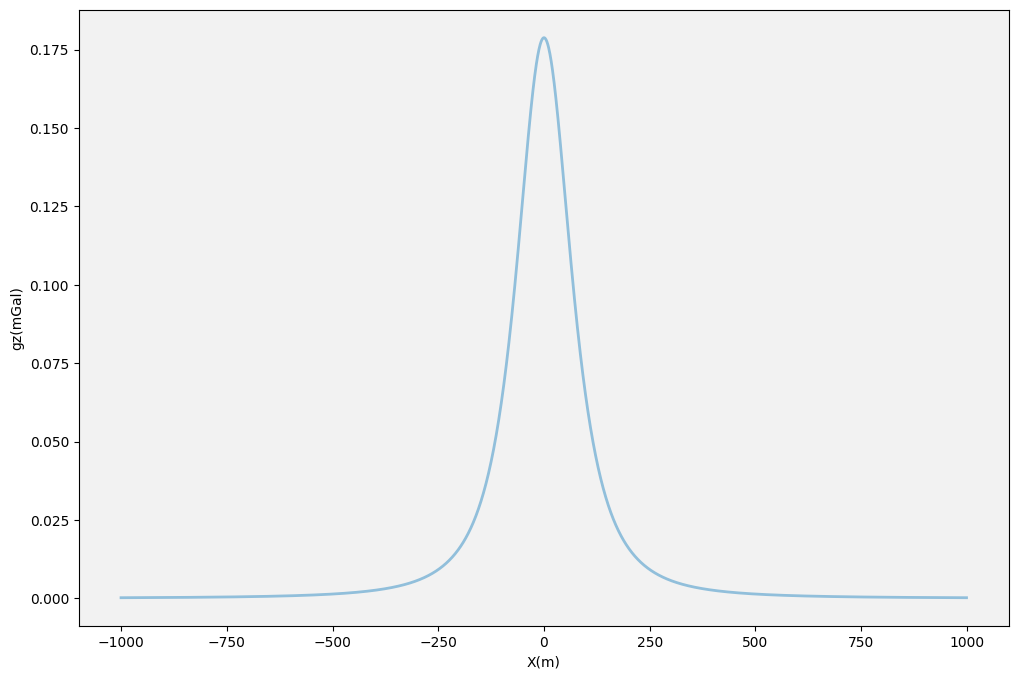

In [115]:
fig = plt.figure(figsize=(12,8))
plt.plot(obs_range, gravity_profile_z, color='#91bfdb', linewidth=2)
plt.xlabel('X(m)') # label
plt.ylabel('gz(mGal)')

<font size="3">
Note that we can use the same function to compute the gravity contours by taking advantage of numpy's array routines.  All we have to do is provide a list of arrays as the argument for the observations, and we get an array of gravity responses.  This is by far the preferred method in python as loop performance is known to be very slow.  In the following, I use meshgrid() to set up the arrays of observation locations and then compute the gravity contours using our original function.
<font>

Text(0.5, 1.0, 'Gravity anomaly of a sphere')

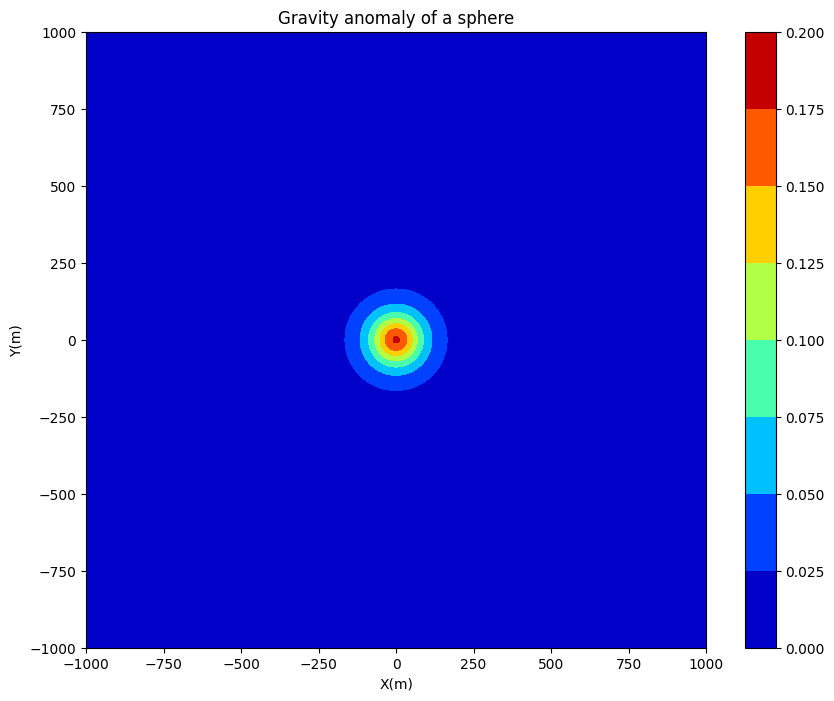

In [116]:
x = np.linspace(-1000,1000,200)
Xp, Yp = np.meshgrid(x,x)
Xobs = np.array([Xp, Yp, np.zeros(np.shape(Xp))])
G = calc_sphere_gravity(Xobs, xsrc, rho, radius)

fig, ax1 = plt.subplots(figsize=(10,8))
CS = ax1.contourf(Xp, Yp, G[2], cmap="jet")
fig.colorbar(CS)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.title('Gravity anomaly of a sphere')


<font size="3">
I will now use our gravity function to create an interactive graph.  Before running the next cells make sure that the calc_sphere_gravity() function inputs and outputs match those that I recommend above.  When you're ready, run the next two cells to create the plotter functions, and which wrap the plot functions with the interact tool.  Finally, adjust the sliders to see how the different parameters affect the gravity profiles and contours.  To observe the non-uniqueness property of the gravity method, see if you can find two distinct parameter regimes that produce the same gravity profile!
<font>

In [117]:
def plot_gravity_profile(x=0, y=0, z=-50, radius=40, rho=1000):
    """
    Plot the gravity responses along a profile. The response is caused by a
    spherical density source.

    Parameters
    ----------
    x, y, z: float
        Location of the center of the sphere in meters.
    radius : float
        Radius of the sphere in meters.
    rho : float
        Density of the sphere in kg/m^3.

    Returns
    -------
    None
    """

    
    obs_range = np.arange(-1000,1000,10)
    xsrc = np.array([x, y, z])
    gravity_profile_z = []
    for x in obs_range:
        xobs = np.array([x, y, 0])
        g = calc_sphere_gravity(xobs, xsrc, rho, radius)
        gravity_profile_z.append(g[2])
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    
    ax1.plot(obs_range, gravity_profile_z, '#91bfdb', linewidth=4)
    ax1.set_xlabel('x(m)', fontsize=18, color='#999999')
    ax1.set_ylim((0,15))
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel(r'$g_z$', color='#91bfdb', fontsize=32)
    for tl in ax1.get_yticklabels():
        tl.set_color('#91bfdb')
        tl.set_size(24)
        
    for tl in ax1.get_xticklabels():
        tl.set_size(18)
        tl.set_color('#999999')


    ax2 = ax1.twinx()
    ax2.set_ylim((-1000,0))
    circle = plt.Circle((xsrc[0],xsrc[2]),radius,color='#fc8d59')
    ax2.add_artist(circle)
    ax2.set_ylabel('y(m)', color='#fc8d59', fontsize=18)
    for tl in ax2.get_yticklabels():
        tl.set_color('#fc8d59')
        tl.set_size(18)
    
    
    plt.show()

In [118]:
def plot_gravity_contours(z=-50, radius=40, rho=1000):
    """
    Plot the contour map of the gravity response caused by a spherical density

    Parameters
    ----------
    z: float
        Location of the center of the sphere in meters. 
    radius : float
        Radius of the sphere in meters.
    rho: float
        Density of the sphere in kg/m^3.

    Returns
    -------
    None
    """

    
    x = np.linspace(-1000, 1000, 200)
    y = np.linspace(-1000, 1000, 200)
    Xp, Yp = np.meshgrid(x,y)
    Zp = np.zeros(np.shape(Yp))
    xq = 0
    yq = 0
    zq = z
    xsrc = [xq, yq, zq]
    
    gamma = 6.67e-11
    r = np.sqrt((Xp - xsrc[0])**2 + (Yp - xsrc[1])**2 + (Zp - xsrc[2])**2)
    Gz = gamma * ((4/3.)*np.pi*rho*(radius**3)) * (Zp - xsrc[2]) / r**3
    Gz *= 1e5
    
    fig, ax1 = plt.subplots(figsize=(10,8))
    levels = np.linspace(0, 17,12)
    CS = ax1.contourf(Xp, Yp, Gz, levels, cmap="jet")
    fig.colorbar(CS)
    
    plt.show()

<font size="3"> 
Run this cell to produce an interactive plot showing the gravity response profile of a solid sphere with anomalous density
<font>

In [119]:
interact(plot_gravity_profile,
         x = widgets.IntSlider(min=-900,max=900,step=20),
         y = widgets.IntSlider(min=-900,max=900,step=20),
         z = widgets.IntSlider(min=-900,max=-100,step=10),
         radius = widgets.IntSlider(min=1,max=100,step=10),
         rho = widgets.IntSlider(min=0,max=5000,step=10))

interactive(children=(IntSlider(value=0, description='x', max=900, min=-900, step=20), IntSlider(value=0, desc…

<function __main__.plot_gravity_profile(x=0, y=0, z=-50, radius=40, rho=1000)>

<font size="3">
Run this cell to plot the gravity response in plan view for a solid sphere of anomalous density
<font>

In [120]:
interact(plot_gravity_contours,
         z = widgets.IntSlider(min=-500,max=-100,step=10),
         radius = widgets.IntSlider(min=10,max=100,step=10),
         rho = widgets.IntSlider(min=1000,max=5000,step=100))

interactive(children=(IntSlider(value=-100, description='z', max=-100, min=-500, step=10), IntSlider(value=10,…

<function __main__.plot_gravity_contours(z=-50, radius=40, rho=1000)>

<font size="3">Next, we will demonstrate the principle of superposition of potential fields.  In other words, we will add the field of one sphere to the field of another.  Superposition tells us that this is equivalent to the field due to the mass distribution consisting of the two spheres together.
<font>

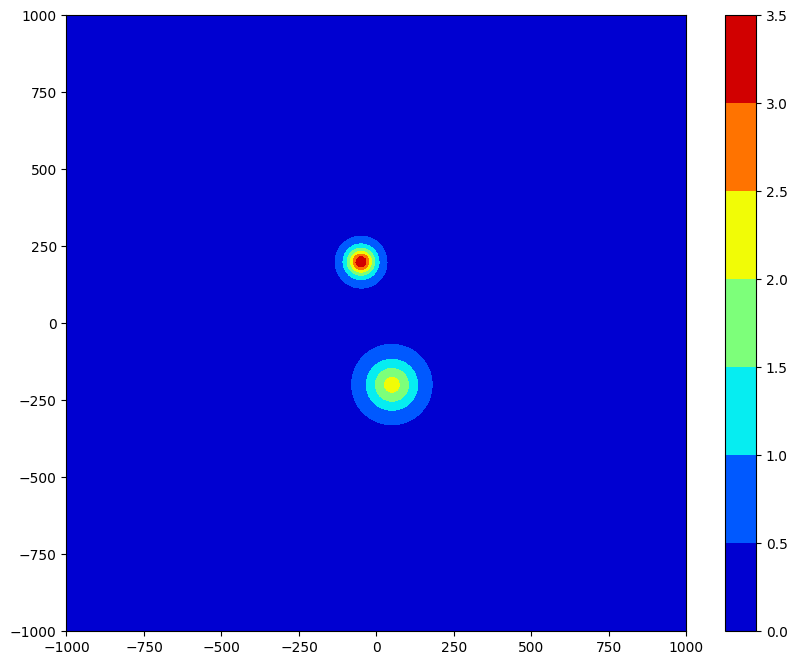

In [122]:
x = np.linspace(-1000,1000,200)
Xp, Yp = np.meshgrid(x,x)
Xobs = np.array([Xp, Yp, np.zeros(np.shape(Xp))]) 

coor1 = np.array([-50, 200, -50])
coor2 = np.array([50, -200, -100])
grav1 = calc_sphere_gravity(Xobs, coor1, 2500, 50)
grav2 = calc_sphere_gravity(Xobs, coor2, 3600, 60)

gravtotalx = grav1[0] + grav2[0]
gravtotaly = grav1[1] + grav2[1]
gravtotalz = grav1[2] + grav2[2]  # Superposition of vertical gravity components


fig, ax1 = plt.subplots(figsize=(10,8))
CS = ax1.contourf(Xp, Yp, gravtotalz, cmap="jet")
fig.colorbar(CS)



Let's save the gravity responses to a csv file so that we can open it in Oasis Montaj. We can use either the Pandas or the CSV library for this.

In [ ]:
# Save a csv file using Pandas
data = np.array([Xp, Yp, gravtotalz]).reshape(3, -1).T
data_df = pd.DataFrame(data, columns=['x', 'y', 'Grav_z'])
data_df.to_csv('pandas_gravity.csv', index=False)

In [ ]:
# Save a csv file using csv
record = np.zeros((len(Xp) * len(Yp), 5), dtype=np.float64)
# Now export G[2] together with the coordinates of the observation points into a
# file which can be read by Oasis Montaj or simply Microsoft Excel.
# We can do this using numpy:
# First, we need to open a file named 'file_1.dat' and specify that we are going
# to write data into the file by 'wt' where 'w' for 'write' and 't' for text
# mode
file = open('file_1.dat', 'wt')
# Build a csv writer instance by calling csv library. BTW, csv is short for 
# 'comma-separated values' format which is readable by Excel
writer = csv.writer(file, delimiter=' ')
writer.writerow(('X:    ', 'Y:    ', 'Z    '))
# We use a 2D loop here to write the coordinates (x and y) and gravity value of 
# one observation point into a row of the file
for ix in range(len(Xp)):
    for iy in range(len(Yp)):
        #GG = calc_sphere_gravity([Xp[ix, iy], Yp[ix, iy], 0.0], xsrc, rho, radius)
        # The reason why it is G[2][ix, iy] is that G itself is a list, which is 
        # comprised of 3 2D numpy arrays and by writting G[2] we are actually 
        # indexing its last dimension which is the last 2D array storing the 
        # z-components of the gravity responses over the observation ponts mesh
        # writerow performs the action of writing a row of data to the writer 
        # instance.
        # Here is something you should read if you are interested in csv module 
        # in pythong: https://pymotw.com/2/csv/
        writer.writerow(
            ('{:25.15f}'.format(Xp[ix, iy]), '{:25.15f}'.format(Yp[ix, iy]), 
             '{:25.15f}'.format(gravtotalz[ix, iy]))
            )
        
        # Get the current row index
        idx = ix * len(Yp) + iy
        # Fill in the 2D numpy array
        record[idx, 0] = Xp[ix, iy]
        record[idx, 1] = Yp[ix, iy]
        record[idx, 2] = gravtotalx[ix, iy]
        record[idx, 3] = gravtotaly[ix, iy]
        record[idx, 4] = gravtotalz[ix, iy]

# Close the previously opened file
file.close()

# Use np.savetxt function provided by numpy package to export the data to a text
# file named 'np_txt.txt'
np.savetxt('np_txt.txt', record, fmt='%25.17f', delimiter=',')

<font size="3">Let's look at that in profile now.  We'll also include the field for a set of profile observations at 100m elevation.
<font>

(0.0, 3.0)

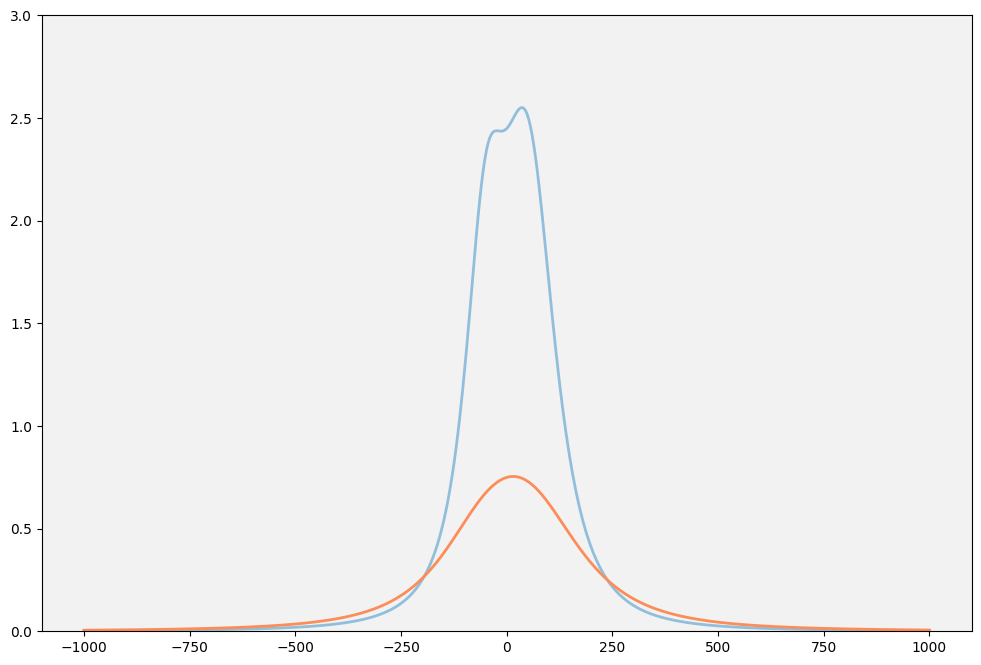

In [106]:
N = 501
obs_range = np.linspace(-1000,1000,N)

xobs_0m = [obs_range, 0, 0]
coor1 = np.array([-50, 0, -75])
coor2 = np.array([50, 0, -100])
g1_0m = calc_sphere_gravity(xobs_0m, coor1, 2500, 50)
g2_0m = calc_sphere_gravity(xobs_0m, coor2, 3600, 60)
g_total_0m = g1_0m[2] + g2_0m[2]

xobs_100m = [obs_range, 0, 100]
g1_100m = calc_sphere_gravity(xobs_100m, coor1, 2500, 50)
g2_100m = calc_sphere_gravity(xobs_100m, coor2, 3600, 60)
g_total_100m = g1_100m[2] + g2_100m[2]

fig = plt.figure(figsize=(12,8))
plt.plot(obs_range, g_total_0m, color='#91bfdb', linewidth=2)
plt.plot(obs_range, g_total_100m, color='#fc8d59', linewidth=2)
plt.ylim([0,3])

<font size="3"> Let's see if we can reproduce the 100m gravity measurements using upward continuation on the 0m data.  I can compute a spatial Fourier transform on the 0m data using Numpy's fast fourier transform (fft).  The fft package also contains a convenient frequency bin generator function called fftfreq().
<font>

In [107]:
spectrum_0m = np.fft.fft(g_total_0m)
N = len(g_total_0m)
dx = obs_range[1] - obs_range[0]
wavenumbers = np.fft.fftfreq(N,1./dx)

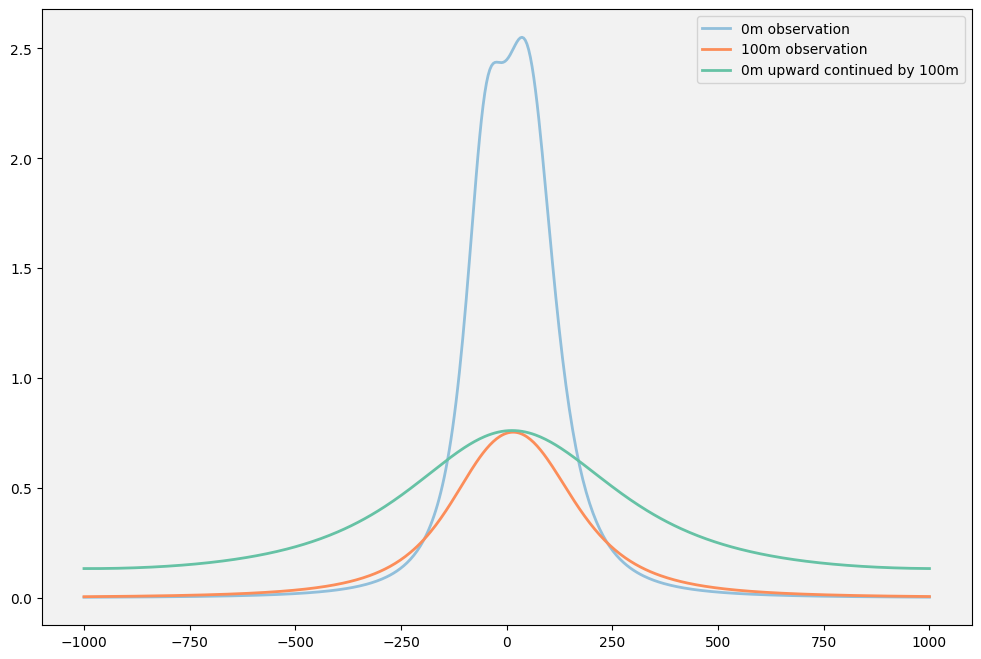

In [108]:
fig = plt.figure(figsize=(12,8))
plt.plot(obs_range, g_total_0m, color='#91bfdb', linewidth=2, 
         label="0m observation")
plt.plot(obs_range, g_total_100m, color='#fc8d59', linewidth=2, 
         label="100m observation")
plt.plot(obs_range, 
         np.real(np.fft.ifft(np.exp(-100*abs(wavenumbers))*spectrum_0m)), 
         color='#66c2a5', 
         linewidth=2, 
         label="0m upward continued by 100m")

plt.legend()